In [2]:
# !pip install seaborn

In [3]:
import os
import numpy as np

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from copy import deepcopy
from tqdm import tqdm, trange

In [ ]:
SAVE_RES_DIR = "./graphs_comparison"

if not os.path.exists(SAVE_RES_DIR):
    os.makedirs(SAVE_RES_DIR)

In [5]:
MATRICES_PATH = "./matrices_new/relevant_matrices/"
MATRICES_FILES = [el for el in os.listdir(MATRICES_PATH) if el.endswith(".csv")]
MATRICES_FILES

['bert__similarity_scores.csv',
 'bioclinical_bert.csv',
 'fisher_test.csv',
 'genes_graph_paper_2007.csv',
 'gpt_oss.csv',
 'mlm_results.csv',
 'new_cat_jacc_sorted.csv',
 'scores_DeepSeek-V3_mean.csv',
 'scores_medbert.csv',
 'scores_qwen3-235b-a22b_0.csv',
 'yandex_doc_search__scores_llm_doc.csv',
 'yandex_gpt_5__yandex_prompt_matrix.csv']

In [ ]:
EXPERIMENT_TITLE = [
    "'Ground truth'\nbased on genes",

    "Fisher exact test\n(MIMIC-IV)",
    "Jaccard\nsimilarity\n(MIMIC-IV)",
    "MLM\n(MIMIC-IV)",

    "Pretrained\nMed-BERT",
    "Pretrained\nBioClinicalBERT",

    "Pretrained\nBERT",
    "Yandex Doc\nSearch",

    "GPT-OSS",
    "Qwen-3",
    "DeepSeek-v3",
    "YandexGPT-5",
]
MATRICES_FILES = [
    'genes_graph_paper_2007.csv',
    
    'fisher_test.csv', # real data
    'new_cat_jacc_sorted.csv', # real data
    'mlm_results.csv', # real data

    'scores_medbert.csv', # pretrained med domain
    'bioclinical_bert.csv', # pretrained med domain

    'bert__similarity_scores.csv', # text
    'yandex_doc_search__scores_llm_doc.csv', # text
    
    'gpt_oss.csv', # llm
    'scores_qwen3-235b-a22b_0.csv', # llm
    'scores_DeepSeek-V3_mean.csv', # llm
    'yandex_gpt_5__yandex_prompt_matrix.csv' # llm
]

In [7]:
common_columns, common_rows = [], []
all_init_dfs = dict()

for m_file in tqdm(MATRICES_FILES):
    if "fisher_test" in m_file:
        sep = ";"
    else:
        sep = ","
    df = pd.read_csv(os.path.join(MATRICES_PATH, m_file), sep=sep)
    if "Unnamed: 0" in df.columns:
        df = df.set_index("Unnamed: 0")
    print(m_file, df.shape)
    all_init_dfs[m_file] = df
    common_columns.append(df.columns.tolist())
    common_rows.append(df.index.tolist())

common_columns = set.intersection(*map(set, common_columns))
common_rows = set.intersection(*map(set, common_rows))

len(common_columns), len(common_rows)

  0%|          | 0/12 [00:00<?, ?it/s]

 17%|█▋        | 2/12 [00:00<00:00, 12.51it/s]

genes_graph_paper_2007.csv (393, 393)
fisher_test.csv (1704, 1704)
new_cat_jacc_sorted.csv (1757, 1757)


 33%|███▎      | 4/12 [00:00<00:01,  4.55it/s]

mlm_results.csv (1757, 1757)


 42%|████▏     | 5/12 [00:01<00:01,  4.00it/s]

scores_medbert.csv (1757, 1757)


 50%|█████     | 6/12 [00:01<00:01,  3.80it/s]

bioclinical_bert.csv (1704, 1704)


 58%|█████▊    | 7/12 [00:01<00:01,  3.72it/s]

bert__similarity_scores.csv (1696, 1696)


 67%|██████▋   | 8/12 [00:02<00:01,  3.26it/s]

yandex_doc_search__scores_llm_doc.csv (1696, 1696)


 75%|███████▌  | 9/12 [00:02<00:00,  3.12it/s]

gpt_oss.csv (2101, 2101)


 83%|████████▎ | 10/12 [00:02<00:00,  3.23it/s]

scores_qwen3-235b-a22b_0.csv (2032, 2032)


 92%|█████████▏| 11/12 [00:03<00:00,  3.16it/s]

scores_DeepSeek-V3_mean.csv (2046, 2046)
yandex_gpt_5__yandex_prompt_matrix.csv (1696, 1696)


100%|██████████| 12/12 [00:03<00:00,  3.71it/s]


(349, 349)

In [8]:
common_icds = sorted(list(common_columns & common_rows))
len(common_icds)

349

In [9]:
common_icds[:10]

['A02', 'A07', 'A22', 'A26', 'A30', 'A32', 'A37', 'A40', 'A41', 'A42']

In [10]:
QUANTILES = [
    0.25,
    # 0.35,
    0.5, 
    0.75, 
    # 0.8, 
    # 0.85,
    0.9,
    # 0.95, 
]

In [11]:
all_dfs = dict()
THRESHOLDS = dict()
for df_name, df in all_init_dfs.items():
    print(df_name)
    df1 = deepcopy(df)
    np.fill_diagonal(df1.values, 0)
    all_dfs[df_name] = df1[common_icds][df1.index.isin(common_icds)].reindex(common_icds)

    print(f"\t{np.unique(all_dfs[df_name].values.flatten()).shape} unique values from {all_dfs[df_name].values.min()} to {all_dfs[df_name].values.max()}")
    THRESHOLDS[df_name] = []
    for TH in QUANTILES:
        quant = np.quantile(all_dfs[df_name].values, TH, interpolation='higher')
        THRESHOLDS[df_name].append(quant)
        print("\t\t", TH, quant, sep="\t")

C:\Users\Asus\AppData\Local\Temp\ipykernel_11928\1420652143.py:12: DeprecationWarning: the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  quant = np.quantile(all_dfs[df_name].values, TH, interpolation='higher')
C:\Users\Asus\AppData\Local\Temp\ipykernel_11928\1420652143.py:12: DeprecationWarning: the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  quant = np.quantile(all_dfs[df_name].values, TH, interpolation='higher')
C:\Users\Asus\AppData\Local\Temp\ipykernel_11928\1420652143.py:12: DeprecationWarning: the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest

genes_graph_paper_2007.csv
	(2,) unique values from 0.0 to 1.0
			0.25	0.0
			0.5	0.0
			0.75	0.0
			0.9	0.0
fisher_test.csv
	(3103,) unique values from 0 to 91108
			0.25	0
			0.5	0
			0.75	10
			0.9	98
new_cat_jacc_sorted.csv
	(29053,) unique values from 0.0 to 0.6718885987815492
			0.25	0.0
			0.5	0.000764331210191
			0.75	0.003940110323089
			0.9	0.013423575860124
mlm_results.csv
	(60702,) unique values from -0.42860276 to 0.74959254
			0.25	-0.04407873
			0.5	0.04560467
			0.75	0.14421757
			0.9	0.24297112
scores_medbert.csv
	(63411,) unique values from 0.0 to 0.9599204
			0.25	0.52932745
			0.5	0.6025071
			0.75	0.6716
			0.9	0.7330977
bioclinical_bert.csv
	(59989,) unique values from 0.0 to 0.41096783
			0.25	0.114032865
			0.5	0.14430869
			0.75	0.1801151
			0.9	0.21636784
bert__similarity_scores.csv
	(60151,) unique values from 0.0 to 0.9991326
			0.25	0.8084358
			0.5	0.8500719
			0.75	0.8842138
			0.9	0.909354
yandex_doc_search__scores_llm_doc.csv
	(60727,) unique values fro

C:\Users\Asus\AppData\Local\Temp\ipykernel_11928\1420652143.py:12: DeprecationWarning: the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  quant = np.quantile(all_dfs[df_name].values, TH, interpolation='higher')
C:\Users\Asus\AppData\Local\Temp\ipykernel_11928\1420652143.py:12: DeprecationWarning: the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  quant = np.quantile(all_dfs[df_name].values, TH, interpolation='higher')
C:\Users\Asus\AppData\Local\Temp\ipykernel_11928\1420652143.py:12: DeprecationWarning: the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest

In [12]:
round(3890.0 / 349 / 349 * 100, 3)

3.194

In [ ]:
all_graphs = dict()
for df_name, df in all_dfs.items():
    print(df_name)
    all_graphs[df_name] = dict()
    for th_ind in range(len(QUANTILES)):
        quantile = QUANTILES[th_ind]
        TH = THRESHOLDS[df_name][th_ind]
        print("\t", f"quantile = {quantile};", f"TH = {TH}", sep="\t")
        print("\t", f"df.shape = {df.shape}")

        df1 = deepcopy(df)
        print("\t", f"df1.shape = {df1.shape}")
        print("\t", f"df.values.flatten().sum() = {df.values.flatten().sum()}")
        print("\t", f"df1.values.flatten().sum() = {df1.values.flatten().sum()}")

        df1 = df1 * (df1 > TH) # zeroing elements lower or equal the quantile
        df1[df1 > 0] = 1 # if an element was not zeroed, we consider it as equal to 1
        df1 = df1.astype(int)

        all_graphs[df_name][quantile] = {
            'threshold': TH,
            'graph': df1,
        }
        n_ones = all_graphs[df_name][quantile]['graph'].values.sum()
        n_el = len(common_icds) * len(common_icds)
        print("\t\t", quantile, round(n_ones / n_el * 100, 3), np.unique(df1))

genes_graph_paper_2007.csv
		quantile = 0.25;	TH = 0.0
	 df.shape = (349, 349)
	 df1.shape = (349, 349)
	 df.values.flatten().sum() = 3890.0
	 df1.values.flatten().sum() = 3890.0
		 0.25 3.194 [0 1]
		quantile = 0.5;	TH = 0.0
	 df.shape = (349, 349)
	 df1.shape = (349, 349)
	 df.values.flatten().sum() = 3890.0
	 df1.values.flatten().sum() = 3890.0
		 0.5 3.194 [0 1]
		quantile = 0.75;	TH = 0.0
	 df.shape = (349, 349)
	 df1.shape = (349, 349)
	 df.values.flatten().sum() = 3890.0
	 df1.values.flatten().sum() = 3890.0
		 0.75 3.194 [0 1]
		quantile = 0.9;	TH = 0.0
	 df.shape = (349, 349)
	 df1.shape = (349, 349)
	 df.values.flatten().sum() = 3890.0
	 df1.values.flatten().sum() = 3890.0
		 0.9 3.194 [0 1]
fisher_test.csv
		quantile = 0.25;	TH = 0
	 df.shape = (349, 349)
	 df1.shape = (349, 349)
	 df.values.flatten().sum() = 15760896
	 df1.values.flatten().sum() = 15760896
		 0.25 45.155 [0 1]
		quantile = 0.5;	TH = 0
	 df.shape = (349, 349)
	 df1.shape = (349, 349)
	 df.values.flatten().su

In [14]:
all_graphs

{'genes_graph_paper_2007.csv': {0.25: {'threshold': 0.0,
   'graph':             A02  A07  A22  A26  A30  A32  A37  A40  A41  A42  ...  Z11  Z13  \
   Unnamed: 0                                                    ...             
   A02           0    0    1    1    0    1    0    1    1    1  ...    0    0   
   A07           0    0    0    0    0    0    0    0    0    0  ...    0    1   
   A22           1    0    0    1    0    1    0    1    1    1  ...    0    0   
   A26           1    0    1    0    0    1    0    1    1    1  ...    0    0   
   A30           0    0    0    0    0    0    0    0    0    0  ...    0    0   
   ...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
   Z72           0    0    0    0    0    0    0    0    0    0  ...    0    0   
   Z81           0    0    0    0    0    0    0    0    0    0  ...    0    0   
   Z82           1    0    1    1    0    1    0    1    1    1  ...    0    0   
   Z83           0    1    0    

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, average_precision_score

In [ ]:
similarity_res = []

for quantile in tqdm(QUANTILES):
    for data_name_1, graph_1 in all_graphs.items():
        for data_name_2, graph_2 in all_graphs.items():
            gr1_fl = graph_1[quantile]["graph"].values.flatten()
            gr2_fl = graph_2[quantile]["graph"].values.flatten()
            if data_name_1 != data_name_2:
                
                tn, fp, fn, tp = confusion_matrix(gr1_fl, gr2_fl).ravel().tolist()
                similarity_res.append(
                    {
                        "ground_truth_data": EXPERIMENT_TITLE[MATRICES_FILES.index(data_name_1)],
                        "compared_data": EXPERIMENT_TITLE[MATRICES_FILES.index(data_name_2)],
                        "quantile": quantile,
                        "accuracy": accuracy_score(gr1_fl, gr2_fl),
                        "precision": precision_score(gr1_fl, gr2_fl),
                        "recall": recall_score(gr1_fl, gr2_fl),
                        "f1": f1_score(gr1_fl, gr2_fl),
                        "pr_auc": average_precision_score(
                            gr1_fl,
                            all_dfs[data_name_2].values.flatten(),
                        ),
                        "graph_edit_distance": np.sum(gr1_fl != gr2_fl),
                        "TN": tn,
                        "FP": fp,
                        "FN": fn,
                        "TP": tp,
                    }
                )
            else:
                tn = gr1_fl[gr1_fl == 0].shape[0]
                tp = gr1_fl[gr1_fl == 1].shape[0]
                similarity_res.append(
                    {
                        "ground_truth_data": EXPERIMENT_TITLE[MATRICES_FILES.index(data_name_1)],
                        "compared_data": EXPERIMENT_TITLE[MATRICES_FILES.index(data_name_2)],
                        "quantile": quantile,
                        "accuracy": 1, 
                        "precision": 1,
                        "recall": 1,
                        "f1": 1,
                        "pr_auc": 1,
                        # "jaccard_score": 1, 
                        # "hamming_loss": 0,
                        "graph_edit_distance": 0,
                        "TN": tn,
                        "FP": 0,
                        "FN": 0,
                        "TP": tp,
                    }
                )

similarity_res = pd.DataFrame(similarity_res)
similarity_res

100%|██████████| 4/4 [00:46<00:00, 11.63s/it]


,ground_truth_data,compared_data,quantile,accuracy,precision,recall,f1,pr_auc,graph_edit_distance,TN,FP,FN,TP
0,'Ground truth'\nbased on genes,'Ground truth'\nbased on genes,0.25,1.000000,1.000000,1.000000,1.000000,1.000000,0,117911,0,0,3890
1,'Ground truth'\nbased on genes,Fisher exact test\n(MIMIC-IV),0.25,0.549470,0.036492,0.515938,0.068162,0.039509,54875,64919,52992,1883,2007
2,'Ground truth'\nbased on genes,Jaccard\nsimilarity\n(MIMIC-IV),0.25,0.385161,0.034415,0.674550,0.065489,0.045036,74888,44289,73622,1266,2624
3,'Ground truth'\nbased on genes,MLM\n(MIMIC-IV),0.25,0.384012,0.037380,0.738817,0.071160,0.057585,75028,43899,74012,1016,2874
4,'Ground truth'\nbased on genes,Pretrained\nMed-BERT,0.25,0.267264,0.032797,0.770180,0.062915,0.054370,89248,29557,88354,894,2996
...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,YandexGPT-5,Yandex Doc\nSearch,0.90,0.903695,0.053859,0.761021,0.100598,0.264606,11730,109415,11524,206,656
572,YandexGPT-5,GPT-OSS,0.90,0.979778,0.091373,0.207657,0.126905,0.042892,2463,119159,1780,683,179
573,YandexGPT-5,Qwen-3,0.90,0.973941,0.129962,0.470998,0.203713,0.120477,3174,118221,2718,456,406
574,YandexGPT-5,DeepSeek-v3,0.90,0.944335,0.084527,0.698376,0.150802,0.201399,6780,114419,6520,260,602


In [17]:
similarity_res['ground_truth_data'] = pd.Categorical(
    similarity_res['ground_truth_data'], 
    categories=EXPERIMENT_TITLE, 
    ordered=True,
)
similarity_res['compared_data'] = pd.Categorical(
    similarity_res['compared_data'], 
    categories=EXPERIMENT_TITLE, 
    ordered=True,
)

In [18]:
similarity_res['ground_truth_data'].unique()

[''Ground truth'\nbased on genes', 'Fisher exact test\n(MIMIC-IV)', 'Jaccard\nsimilarity\n(MIMIC-IV)', 'MLM\n(MIMIC-IV)', 'Pretrained\nMed-BERT', ..., 'Yandex Doc\nSearch', 'GPT-OSS', 'Qwen-3', 'DeepSeek-v3', 'YandexGPT-5']
Length: 12
Categories (12, object): [''Ground truth'\nbased on genes' < 'Fisher exact test\n(MIMIC-IV)' < 'Jaccard\nsimilarity\n(MIMIC-IV)' < 'MLM\n(MIMIC-IV)' ... 'GPT-OSS' < 'Qwen-3' < 'DeepSeek-v3' < 'YandexGPT-5']

In [19]:
similarity_res[similarity_res["quantile"] == QUANTILES[-1]].pivot(index='ground_truth_data', columns='compared_data', values='accuracy')

compared_data,'Ground truth'\nbased on genes,Fisher exact test\n(MIMIC-IV),Jaccard\nsimilarity\n(MIMIC-IV),MLM\n(MIMIC-IV),Pretrained\nMed-BERT,Pretrained\nBioClinicalBERT,Pretrained\nBERT,Yandex Doc\nSearch,GPT-OSS,Qwen-3,DeepSeek-v3,YandexGPT-5
ground_truth_data,,,,,,,,,,,,
'Ground truth'\nbased on genes,1.000000,0.878162,0.879590,0.881397,0.880641,0.873909,0.878178,0.886783,0.955789,0.950723,0.922365,0.965715
Fisher exact test\n(MIMIC-IV),0.878162,1.000000,0.935764,0.837916,0.823105,0.820954,0.826290,0.824139,0.891372,0.888457,0.863564,0.897242
Jaccard\nsimilarity\n(MIMIC-IV),0.879590,0.935764,1.000000,0.845617,0.827194,0.819575,0.829000,0.830281,0.890370,0.888769,0.865995,0.898507
MLM\n(MIMIC-IV),0.881397,0.837916,0.845617,1.000000,0.832875,0.816258,0.823417,0.838556,0.890403,0.888704,0.868720,0.898934
Pretrained\nMed-BERT,0.880641,0.823105,0.827194,0.832875,1.000000,0.815371,0.832218,0.863745,0.892406,0.889131,0.872727,0.900970
Pretrained\nBioClinicalBERT,0.873909,0.820954,0.819575,0.816258,0.815371,1.000000,0.802892,0.807424,0.886659,0.876815,0.848589,0.893416
Pretrained\nBERT,0.878178,0.826290,0.829000,0.823417,0.832218,0.802892,1.000000,0.850412,0.888022,0.884172,0.861758,0.897127
Yandex Doc\nSearch,0.886783,0.824139,0.830281,0.838556,0.863745,0.807424,0.850412,1.000000,0.893342,0.896684,0.884648,0.903695
GPT-OSS,0.955789,0.891372,0.890370,0.890403,0.892406,0.886659,0.888022,0.893342,1.000000,0.964869,0.934524,0.979778


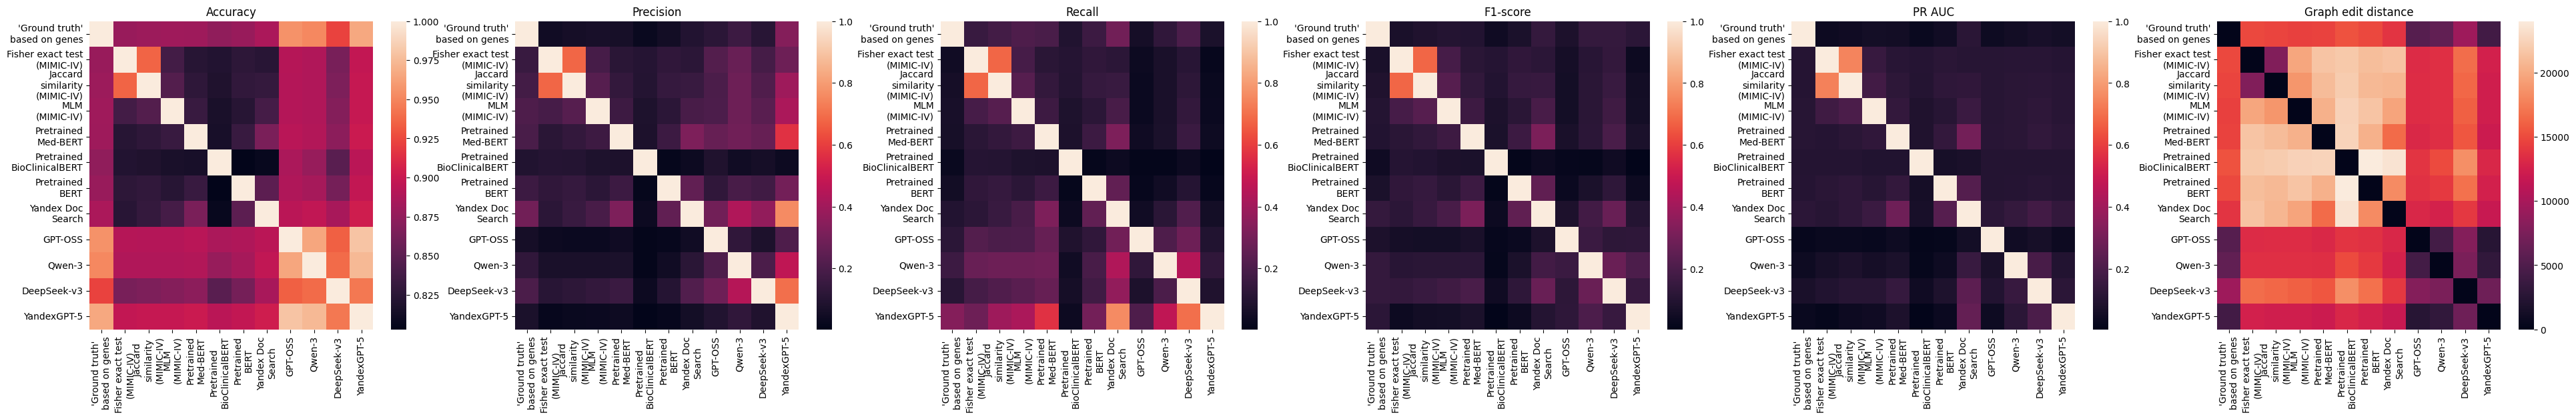

In [20]:
metrics_to_viz = {
    "accuracy": "Accuracy",
    "precision": "Precision",
    "recall": "Recall",
    "f1": "F1-score",
    "pr_auc": "PR AUC",
    "graph_edit_distance": "Graph edit distance",
}
n = len(metrics_to_viz)
fig, ax = plt.subplots(1, n, figsize=(8*n, 6))

for i, (metric, metric_name) in enumerate(metrics_to_viz.items()):
    sns.heatmap(
        data=similarity_res[similarity_res["quantile"] == QUANTILES[-1]].pivot(index='ground_truth_data', columns='compared_data', values=metric),
        # x='compared_data',
        # y='ground_truth_data',
        # hue=metric,
        ax=ax[i],
    )
    ax[i].set_xlabel("")
    ax[i].set_ylabel("")
    ax[i].set_title(metric_name);

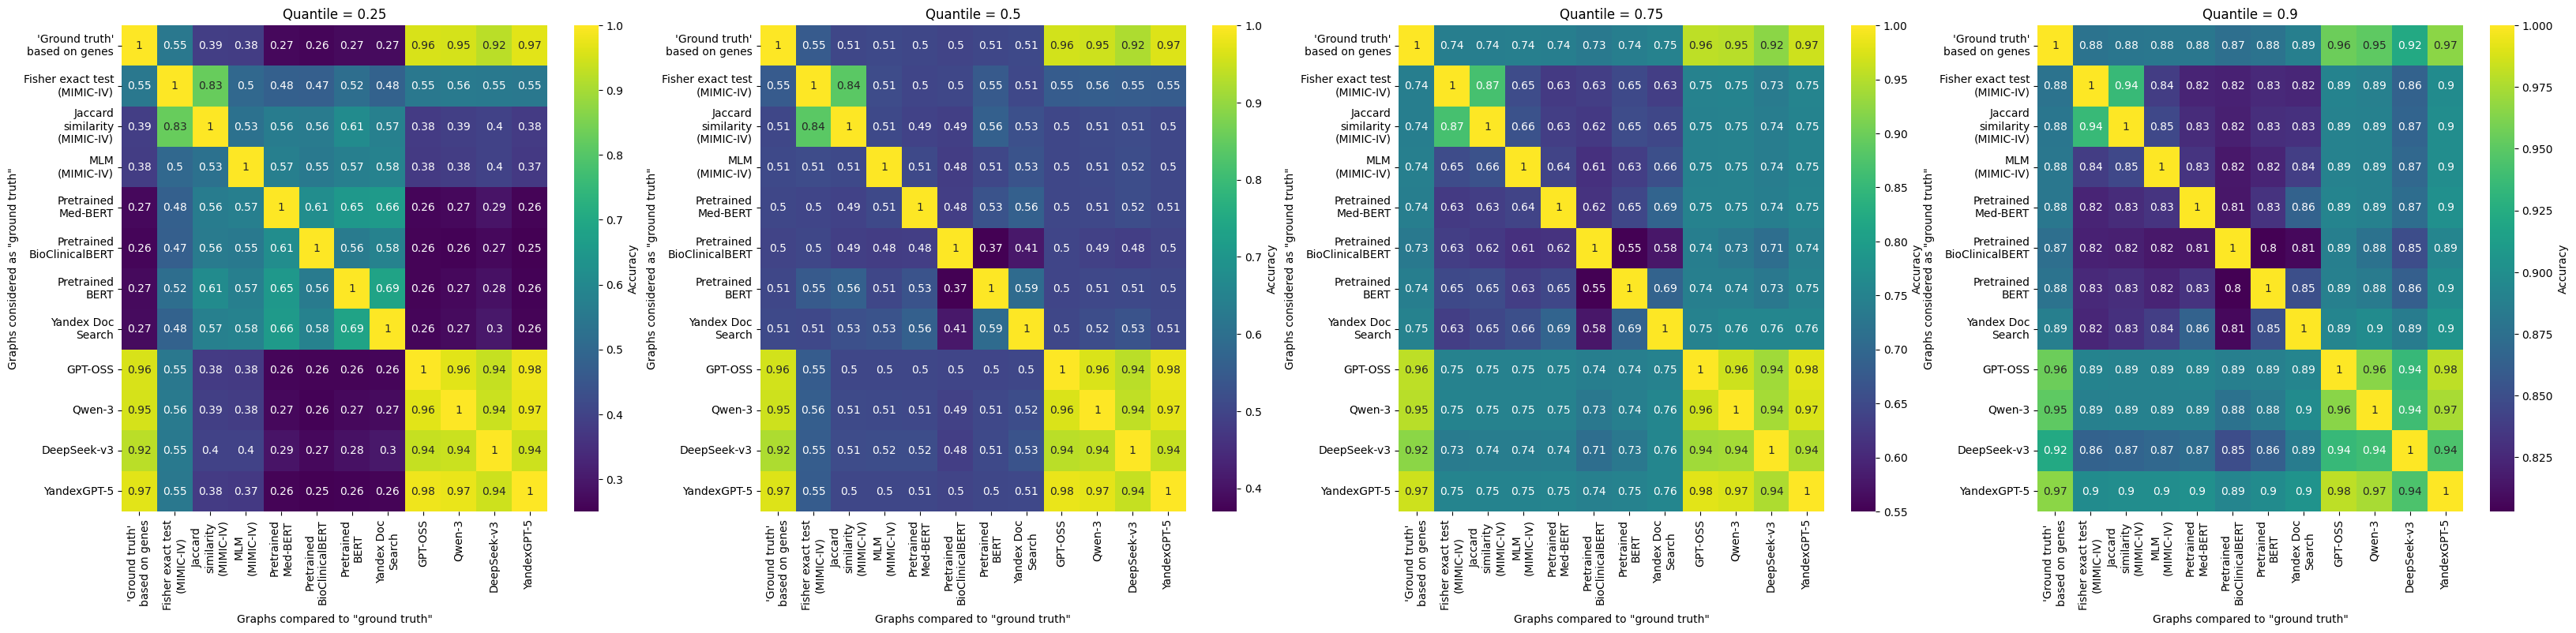

In [ ]:
metrics_to_viz = {
    "accuracy": "Accuracy",
    # "precision": "Precision",
    # "recall": "Recall",
    # "f1": "F1-score",
    # "pr_auc": "PR AUC",
    # "graph_edit_distance": "Graph edit distance",
}
n = len(QUANTILES)
fig, ax = plt.subplots(1, n, figsize=(10*n, 8))

for i, quntile in enumerate(QUANTILES):
    for metric, metric_name in metrics_to_viz.items():
        pivot_data = similarity_res[similarity_res["quantile"] == quntile].pivot(index='ground_truth_data', columns='compared_data', values=metric).round(3)
        pivot_data.to_excel(
            f"{SAVE_RES_DIR}/{metric}_mimic_quantile_{quntile}.xlsx"
        )
        sns.heatmap(
            data=pivot_data,
            ax=ax[i],
            cmap="viridis",
            cbar_kws={"label": metric_name},
            annot=True,
        )
        ax[i].set_xlabel('Graphs compared to "ground truth"')
        ax[i].set_ylabel('Graphs considered as "ground truth"')
        ax[i].set_title(f"Quantile = {quntile}");

plt.savefig(
    f"{SAVE_RES_DIR}/accuracy_mimic_quantiles_{'_'.join(map(str, QUANTILES)).replace('.', '')}.png",
    dpi=300,
    bbox_inches="tight",
)
plt.show()

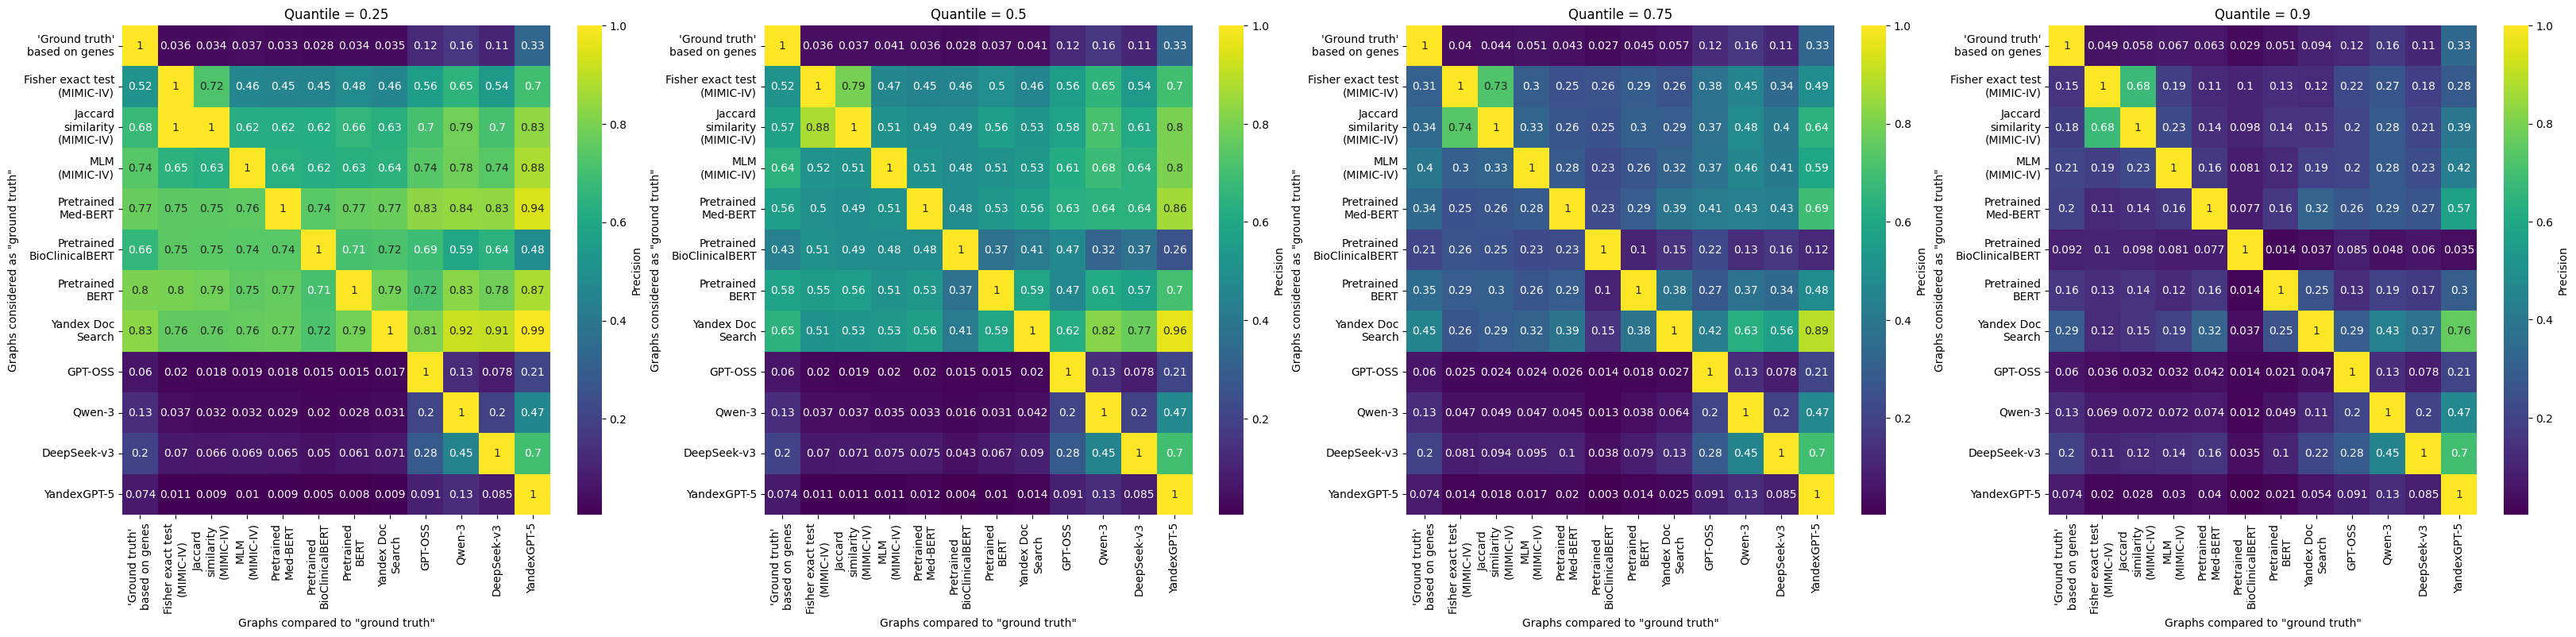

In [ ]:
metrics_to_viz = {
    # "accuracy": "Accuracy",
    "precision": "Precision",
    # "recall": "Recall",
    # "f1": "F1-score",
    # "pr_auc": "PR AUC",
    # "graph_edit_distance": "Graph edit distance",
}
n = len(QUANTILES)
fig, ax = plt.subplots(1, n, figsize=(10*n, 8))

for i, quntile in enumerate(QUANTILES):
    for metric, metric_name in metrics_to_viz.items():
        pivot_data = similarity_res[similarity_res["quantile"] == quntile].pivot(index='ground_truth_data', columns='compared_data', values=metric).round(3)
        pivot_data.to_excel(
            f"{SAVE_RES_DIR}/{metric}_mimic_quantile_{quntile}.xlsx"
        )
        sns.heatmap(
            data=pivot_data,
            ax=ax[i],
            cmap="viridis",
            cbar_kws={"label": metric_name},
            annot=True,
        )
        ax[i].set_xlabel('Graphs compared to "ground truth"')
        ax[i].set_ylabel('Graphs considered as "ground truth"')
        ax[i].set_title(f"Quantile = {quntile}");

plt.savefig(
    f"{SAVE_RES_DIR}/precision_mimic_quantiles_{'_'.join(map(str, QUANTILES)).replace('.', '')}.png",
    dpi=300,
    bbox_inches="tight",
)
plt.show()

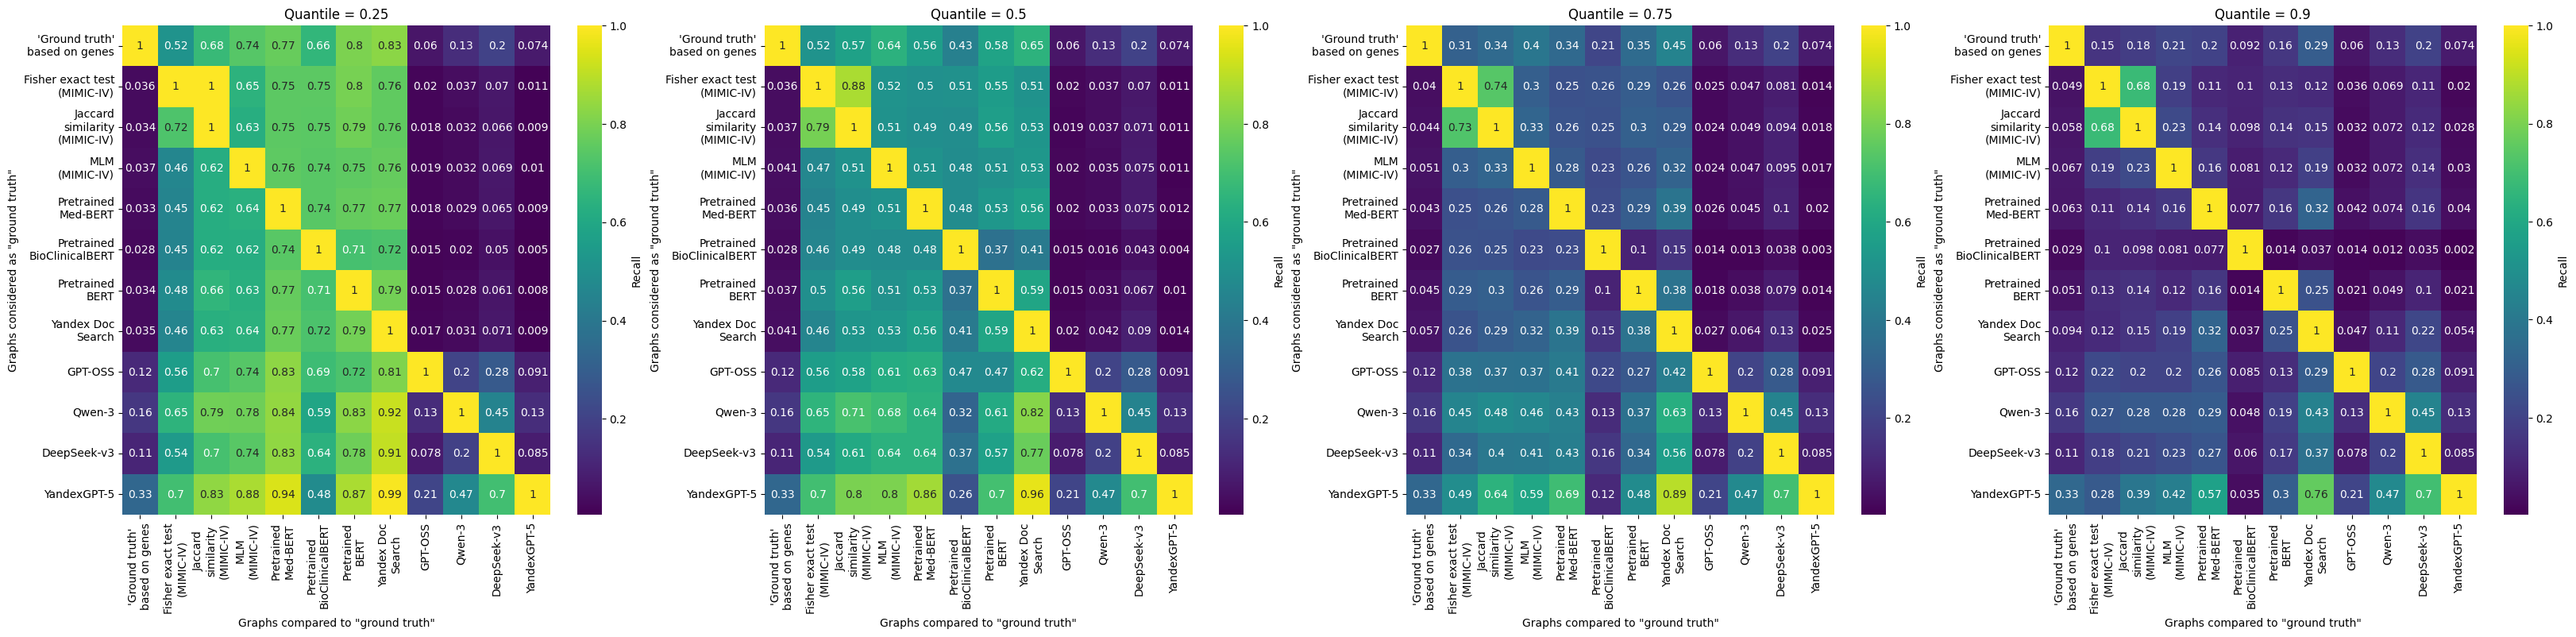

In [ ]:
metrics_to_viz = {
    # "accuracy": "Accuracy",
    # "precision": "Precision",
    "recall": "Recall",
    # "f1": "F1-score",
    # "pr_auc": "PR AUC",
    # "graph_edit_distance": "Graph edit distance",
}
n = len(QUANTILES)
fig, ax = plt.subplots(1, n, figsize=(10*n, 8))

for i, quntile in enumerate(QUANTILES):
    for metric, metric_name in metrics_to_viz.items():
        pivot_data = similarity_res[similarity_res["quantile"] == quntile].pivot(index='ground_truth_data', columns='compared_data', values=metric).round(3)
        pivot_data.to_excel(
            f"{SAVE_RES_DIR}/{metric}_mimic_quantile_{quntile}.xlsx"
        )
        sns.heatmap(
            data=pivot_data,
            ax=ax[i],
            cmap="viridis",
            cbar_kws={"label": metric_name},
            annot=True,
        )
        ax[i].set_xlabel('Graphs compared to "ground truth"')
        ax[i].set_ylabel('Graphs considered as "ground truth"')
        ax[i].set_title(f"Quantile = {quntile}");

plt.savefig(
    f"{SAVE_RES_DIR}/recall_mimic_quantiles_{'_'.join(map(str, QUANTILES)).replace('.', '')}.png",
    dpi=300,
    bbox_inches="tight",
)
plt.show()

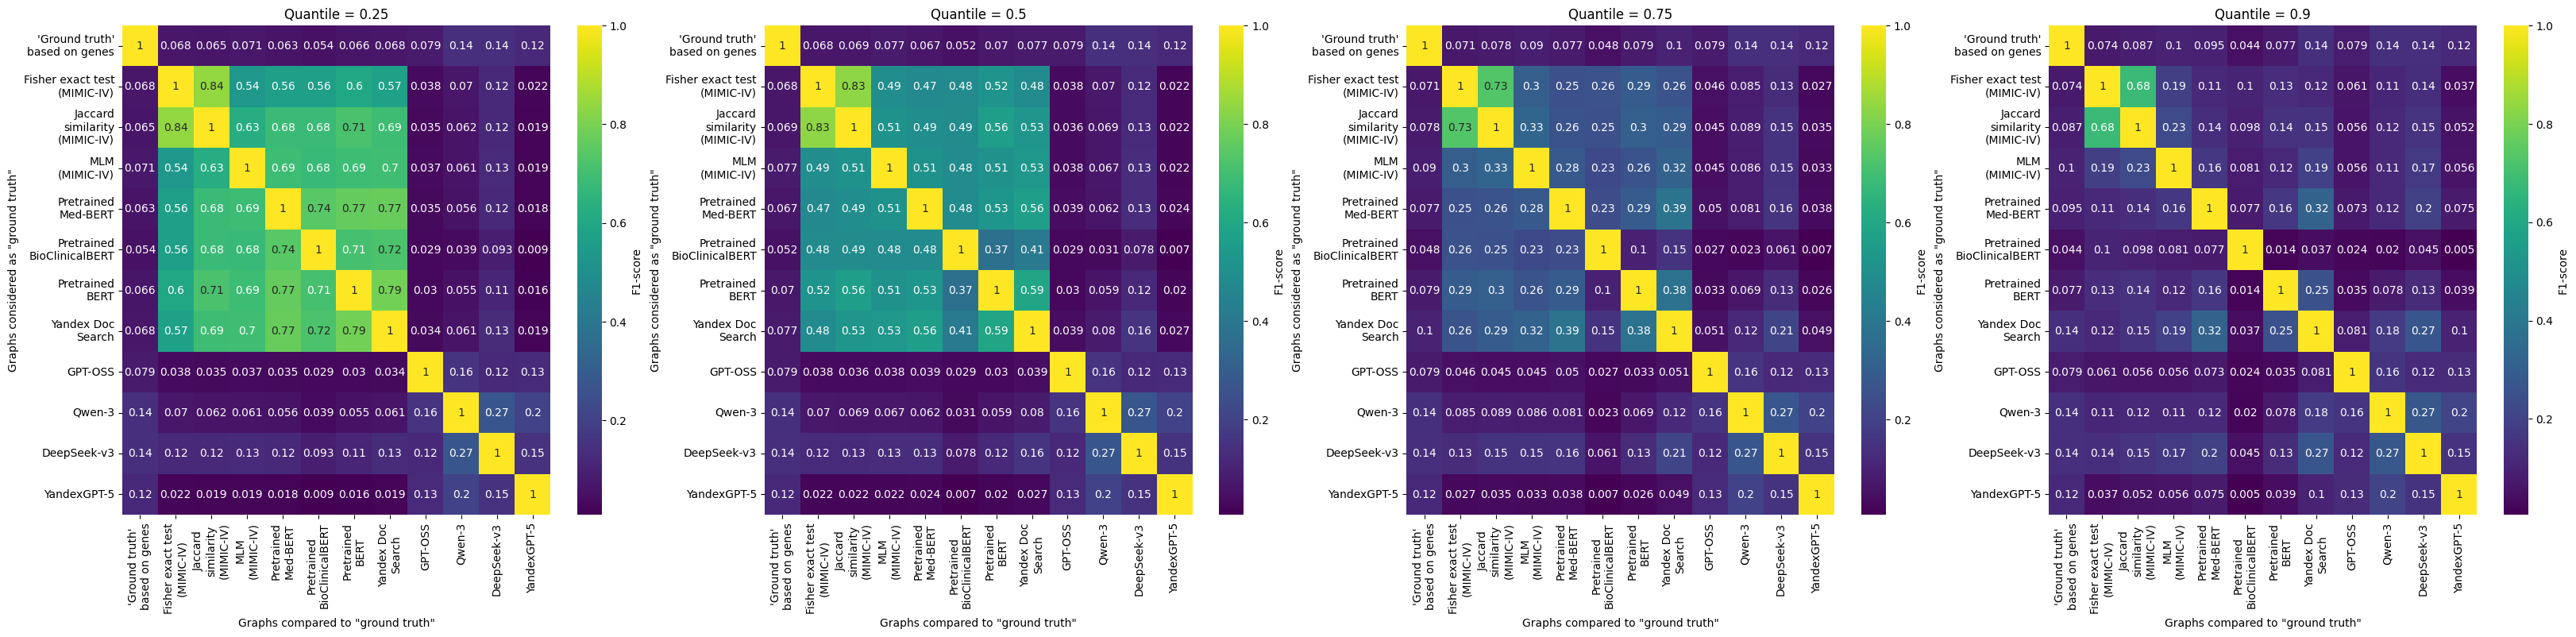

In [ ]:
metrics_to_viz = {
    # "accuracy": "Accuracy",
    # "precision": "Precision",
    # "recall": "Recall",
    "f1": "F1-score",
    # "pr_auc": "PR AUC",
    # "graph_edit_distance": "Graph edit distance",
}
n = len(QUANTILES)
fig, ax = plt.subplots(1, n, figsize=(10*n, 8))

for i, quntile in enumerate(QUANTILES):
    for metric, metric_name in metrics_to_viz.items():
        sns.heatmap(
            data=similarity_res[similarity_res["quantile"] == quntile].pivot(index='ground_truth_data', columns='compared_data', values=metric).round(3),
            ax=ax[i],
            cmap="viridis",
            cbar_kws={"label": metric_name},
            annot=True,
        )
        ax[i].set_xlabel('Graphs compared to "ground truth"')
        ax[i].set_ylabel('Graphs considered as "ground truth"')
        ax[i].set_title(f"Quantile = {quntile}");

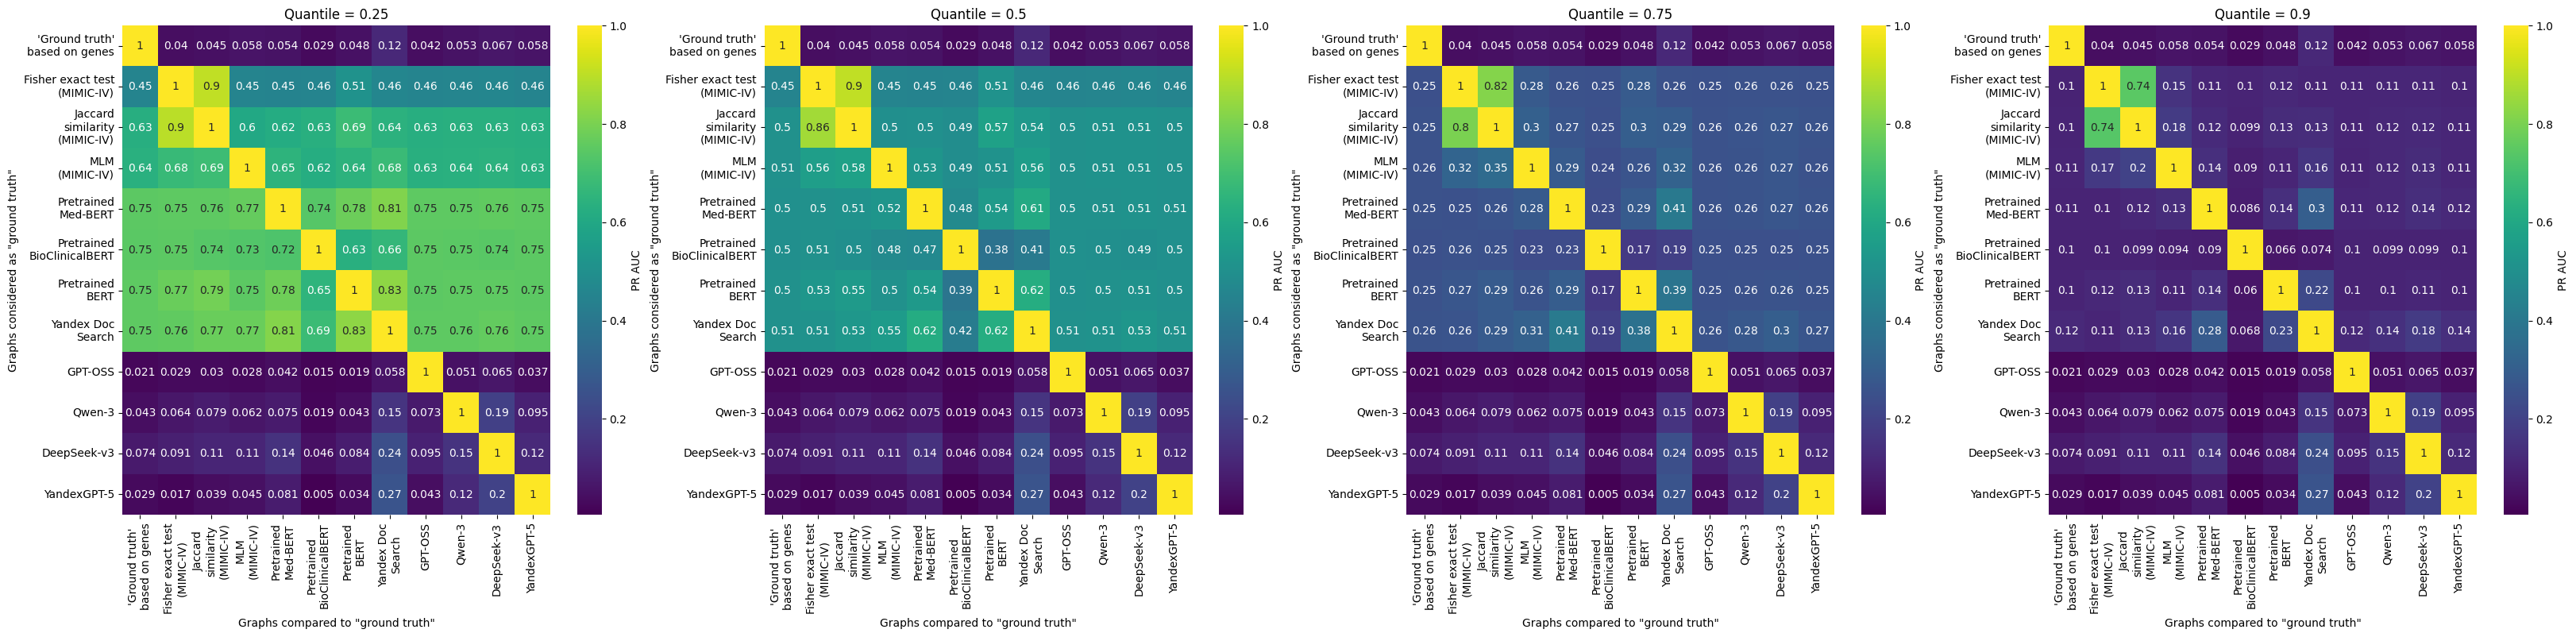

In [ ]:
metrics_to_viz = {
    # "accuracy": "Accuracy",
    # "precision": "Precision",
    # "recall": "Recall",
    # "f1": "F1-score",
    "pr_auc": "PR AUC",
    # "graph_edit_distance": "Graph edit distance",
}
n = len(QUANTILES)
fig, ax = plt.subplots(1, n, figsize=(10*n, 8))

for i, quntile in enumerate(QUANTILES):
    for metric, metric_name in metrics_to_viz.items():
        sns.heatmap(
            data=similarity_res[similarity_res["quantile"] == quntile].pivot(index='ground_truth_data', columns='compared_data', values=metric).round(3),
            ax=ax[i],
            cmap="viridis",
            cbar_kws={"label": metric_name},
            annot=True,
        )
        ax[i].set_xlabel('Graphs compared to "ground truth"')
        ax[i].set_ylabel('Graphs considered as "ground truth"')
        ax[i].set_title(f"Quantile = {quntile}");

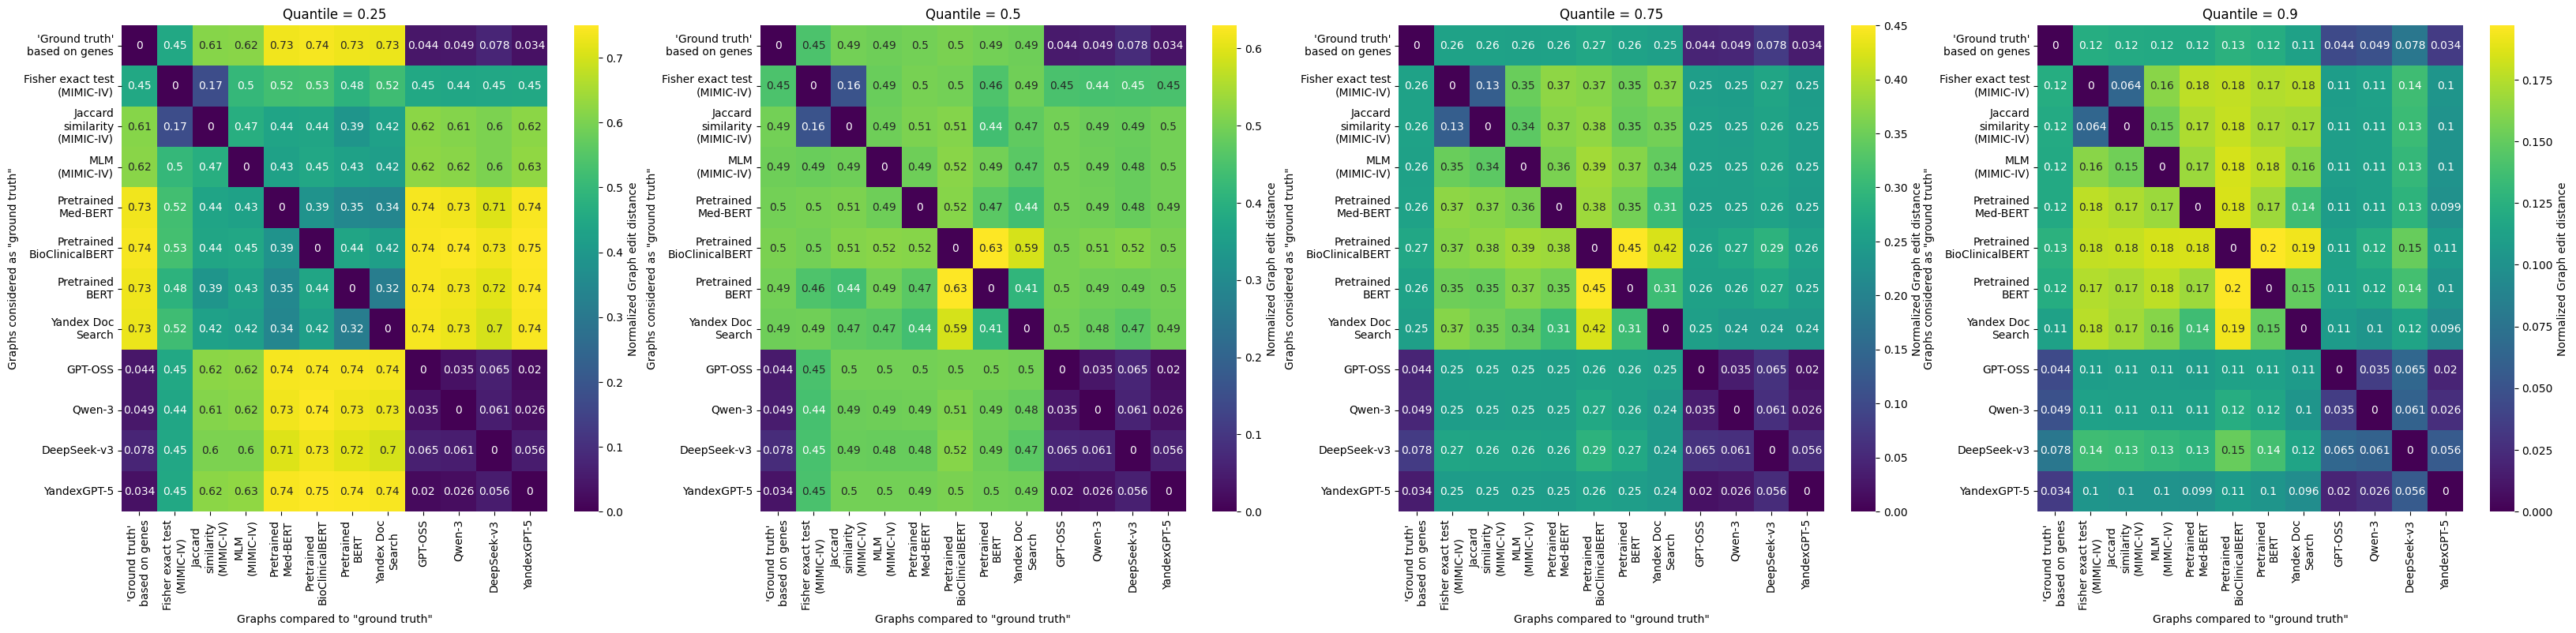

In [ ]:
metrics_to_viz = {
    # "accuracy": "Accuracy",
    # "precision": "Precision",
    # "recall": "Recall",
    # "f1": "F1-score",
    # "pr_auc": "PR AUC",
    "graph_edit_distance": "Graph edit distance",
}
n = len(QUANTILES)
fig, ax = plt.subplots(1, n, figsize=(10*n, 8))

for i, quntile in enumerate(QUANTILES):
    for metric, metric_name in metrics_to_viz.items():
        sns.heatmap(
            data=(similarity_res[similarity_res["quantile"] == quntile].pivot(index='ground_truth_data', columns='compared_data', values=metric) / len(common_icds) / len(common_icds)).round(3),
            ax=ax[i],
            cmap="viridis",
            cbar_kws={"label": "Normalized "+metric_name},
            annot=True,
        )
        ax[i].set_xlabel('Graphs compared to "ground truth"')
        ax[i].set_ylabel('Graphs considered as "ground truth"')
        ax[i].set_title(f"Quantile = {quntile}");